## Bibliotecas

In [1]:
#Importar Bibliotecas
import pandas as pd
import requests as rqs
import os
import tweepy
import numpy as np
import json
import time
import re
import seaborn as sns
from IPython.display import clear_output
#import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

## Constantes

In [2]:
twitter_arc = 'twitter-archive-enhanced.csv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_prev = 'image-predictions.tsv'
tweet_json = 'tweet_json.txt'


## Coletando Dados

In [3]:
#Dataframe do arquivo de Tweets WeRateDogs fornecido ('twitter-archive-enhanced.csv')
df_twitter_arc = pd.read_csv(twitter_arc, encoding='utf-8')
#Validar Estrutura
df_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
#Dataframe do arquivo com as previsões de imagens em tweets (image_predictions.tsv) 
response = rqs.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content) 
    
df_image_prev = pd.read_csv(image_prev, sep = '\t', encoding = 'utf-8')
#Validar Estrutura
df_image_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [5]:
#Geração de arquivo Json com a coleta de dado do Tweeter WeRateDogs por API
#Chaves necessárias para autorização da API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

#Chamadas de Autorização
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#Inicia APi
api = tweepy.API(auth,
              wait_on_rate_limit = True, # Limite de taxa
              wait_on_rate_limit_notify = True) # Notificação de espera

In [6]:
id_twitters = df_twitter_arc.tweet_id.values
id_twitters

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [58]:
#Gerar arquivo arquivo('tweet_json.txt') de Tweets WeRateDogs coletado via API

id_twitters = df_twitter_arc.tweet_id.values
id_errors = []

try:
    with open(tweet_json, 'w') as file:
        for i, id_t in enumerate(id_twitters):
            clear_output()
            try:
                tweet = api.get_status(id_t, tweet_mode='extended')
                file.write(json.dumps(tweet._json))
                if i < len(id_twitters) - 1:
                    file.write('\n')
            except tweepy.TweepError:
                id_errors.append(id_t)
    clear_output()
    print('Arquivo {} gravado com sucesso!'.format(tweet_json))
except IOError as err:
    print("Erro de I/O: {}".format(err))

if(len(id_errors)) > 0:
    error_json_file = 'id_json_errors.txt'
    print('\nLista de id\'s que não foi possível recuperar informações: {}'.format(id_errors))
    try:
        with open(error_json_file, 'w') as file:
            for id_e in id_errors:
                file.write(str(id_e) + '\n')              
            print('\nArquivo {} gravado com sucesso!'.format(error_json_file))
    except IOError as err:
        print("\nErro de I/O: {}".format(err))

Arquivo tweet_json.txt gravado com sucesso!

Lista de id's que não foi possível recuperar informações: [888202515573088257, 873697596434513921, 869988702071779329, 866816280283807744, 861769973181624320, 845459076796616705, 842892208864923648, 837012587749474308, 827228250799742977, 802247111496568832, 775096608509886464, 770743923962707968, 754011816964026368]

Arquivo id_json_errors.txt gravado com sucesso!


In [5]:
#Dataframe do arquivo de Tweets WeRateDogs coletado via API
df_arquivo_json = []

try:
    with open(tweet_json) as file:
        for line in file:
            current_json = json.loads(line)
            tweet_id = current_json['id']
            retweets = current_json['retweet_count']
            favoritos = current_json['favorite_count']
            df_arquivo_json.append({'tweet_id': int(tweet_id),
                                    'retweet_count': int(retweets),
                                    'favorite_count': int(favoritos)})
except FileNotFoundError as err:                         
    print("\nErro de I/O: {}".format(err))

    
df_tweet_json = pd.DataFrame(df_arquivo_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

#Validar Estrutura
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
tweet_id          2343 non-null int64
retweet_count     2343 non-null int64
favorite_count    2343 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


## Analisando Dados

In [6]:
#Primeiros 10 registros 
#Dataframe do arquivo de Tweets WeRateDogs fornecido ('twitter-archive-enhanced.csv')
df_twitter_arc.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#Amostra de 10 registros 
#Dataframe do arquivo de Tweets WeRateDogs fornecido ('twitter-archive-enhanced.csv')
df_twitter_arc.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
727,782305867769217024,NaN,NaN,2016-10-01 19:47:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He just graduated. Ready to b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782305867...,12,10,Sampson,doggo,None,None,None
1906,674468880899788800,NaN,NaN,2015-12-09 06:01:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He thinks he's flying. 13/10 th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674468880...,13,10,Louis,None,None,None,None
2187,668979806671884288,NaN,NaN,2015-11-24 02:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chaz. He's an X Games half pipe supers...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668979806...,12,10,Chaz,None,None,None,None
864,762464539388485633,NaN,NaN,2016-08-08 01:44:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. His father was a bear and his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,None,None,None,None
1012,747242308580548608,NaN,NaN,2016-06-27 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,7.047611e+17,4.196984e+09,2016-03-01 20:11:59 +0000,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1390,700151421916807169,NaN,NaN,2016-02-18 02:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700151421...,11,10,None,None,None,pupper,None
1383,700847567345688576,NaN,NaN,2016-02-20 01:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Crouton. He's a Galapagos Boonwiddle. Has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700847567...,10,10,Crouton,None,None,None,None
1188,718454725339934721,NaN,NaN,2016-04-08 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pic is old but I hadn't seen it until tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718454725...,13,10,None,None,None,None,None
1658,683111407806746624,NaN,NaN,2016-01-02 02:23:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Larry. He thought the New Year's parti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683111407...,10,10,Larry,None,None,pupper,None
1920,674265582246694913,NaN,NaN,2015-12-08 16:33:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Henry. He's a shit dog. Short pointy e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,None,None,None,None


In [8]:
#Ultimos 10 registros 
#Dataframe do arquivo de Tweets WeRateDogs fornecido ('twitter-archive-enhanced.csv')
df_twitter_arc.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
df_twitter_arc['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Toby          7
an            7
Daisy         7
Buddy         7
Bailey        7
Bella         6
Jax           6
Koda          6
Oscar         6
Rusty         6
Stanley       6
Leo           6
Dave          6
Scout         6
Jack          6
Milo          6
Chester       5
           ... 
Crawford      1
Pawnd         1
Ember         1
Mitch         1
Darby         1
Tuco          1
Tito          1
Livvie        1
Bruno         1
Rupert        1
Brady         1
Bode          1
Jim           1
Thor          1
Marty         1
Chaz          1
Ralf          1
Miley         1
Zeek          1
Brockly       1
Shooter       1
Noosh         1
Trevith       1
Dotsy         1
Taz           1
Chef          1
Berb          1
Ebby          1
Bobble        1
life          1
Name: name, Length: 957,

In [10]:
#Verificar se existe algum cachorro com mais de um estágio atribuido
dog_stage_all = 'doggo == "None" & floofer == "None" & pupper == "None" & puppo == "None"'
dog_stage_mult = '(doggo == "doggo" & '\
                 '(floofer == "floofer" | pupper == "pupper" | puppo == "puppo")) |'\
                 '(floofer == "floofer" & (pupper == "pupper" | puppo == "puppo"))|'\
                 '(pupper == "pupper" & puppo == "puppo")'


df_dog_stage_all_none = df_twitter_arc.query(dog_stage_all)
df_dog_stage_all_none.info()

df_dog_stage_mult = df_twitter_arc.query(dog_stage_mult)
df_dog_stage_mult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1976 non-null int64
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     1976 non-null object
source                        1976 non-null object
text                          1976 non-null object
retweeted_status_id           145 non-null float64
retweeted_status_user_id      145 non-null float64
retweeted_status_timestamp    145 non-null object
expanded_urls                 1923 non-null object
rating_numerator              1976 non-null int64
rating_denominator            1976 non-null int64
name                          1976 non-null object
doggo                         1976 non-null object
floofer                       1976 non-null object
pupper                        1976 non-null object
puppo                         1976 non-null object
dtypes: float64(4), int64(3), ob

In [86]:
# configuracao para mostrar o texto completo (Dica do revisor)
pd.set_option('display.max_colwidth', -1)
# filtra apenas os tweets com numero decimal no texto
df_twitter_arc[df_twitter_arc.text.str.extract(r'(\d+\.\d+)', expand=False).notnull()].text


45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
259     This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL                   
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1018    Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ                                                                               

In [126]:
# Verificando se o numerador está coerente
df_twitter_arc['rating_numerator'].value_counts()
#Até 14 parece ser um numerador normal, a partir disse, parece distorção da informação


12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [127]:
# Verificando se o denominador está coerente
df_twitter_arc['rating_denominator'].value_counts()
#Até 10 parece ser um numerador normal, a partir disse, parece distorção da informação

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [87]:
#Primeiros 10 registros 
#Dataframe do arquivo com as previsões de imagens em tweets (image_predictions.tsv) 
df_image_prev.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [88]:
#Ultimos 10 registros 
#Dataframe do arquivo com as previsões de imagens em tweets (image_predictions.tsv) 
df_image_prev.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,Chihuahua,0.756992,True,Pomeranian,0.052850,True,Maltese_dog,0.047608,True
165,668979806671884288,https://pbs.twimg.com/media/CUixld6WoAArDrJ.jpg,1,golden_retriever,0.608537,True,Irish_setter,0.097078,True,redbone,0.076022,True
1153,732726085725589504,https://pbs.twimg.com/media/CisqdVcXEAE3iW7.jpg,1,Pomeranian,0.961902,True,Samoyed,0.024289,True,chow,0.005772,True
879,698549713696649216,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,1,French_bulldog,0.998544,True,Boston_bull,0.001404,True,boxer,0.000023,True
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1,ski_mask,0.968325,False,mask,0.021863,False,abaya,0.005479,False
1663,812372279581671427,https://pbs.twimg.com/media/C0YgO3DW8AAz98O.jpg,2,golden_retriever,0.784873,True,cocker_spaniel,0.087788,True,Labrador_retriever,0.083275,True
1862,842765311967449089,https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg,1,tub,0.665238,False,bucket,0.105166,False,Labrador_retriever,0.029340,True
1019,710140971284037632,https://pbs.twimg.com/media/Cdrtcr-W4AAqi5H.jpg,1,Pekinese,0.953170,True,papillon,0.019517,True,Japanese_spaniel,0.005821,True
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True
1498,783695101801398276,https://pbs.twimg.com/media/CuA-iRHXYAAWP8e.jpg,3,chow,0.314265,True,golden_retriever,0.300435,True,Australian_terrier,0.049487,True


In [89]:
#Ultimos 10 registros 
#Dataframe do arquivo com as previsões de imagens em tweets (image_predictions.tsv) 
df_image_prev.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [90]:
#Verificando a possibilidade da imagem não ter sido classicada como cachoro em nenhuma das colunas de previsões
dog_prev_all = 'p1_dog == False & p2_dog == False & p3_dog == False'

df_dog_prev_all_false = df_image_prev.query(dog_prev_all)
df_dog_prev_all_false.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 12 columns):
tweet_id    324 non-null int64
jpg_url     324 non-null object
img_num     324 non-null int64
p1          324 non-null object
p1_conf     324 non-null float64
p1_dog      324 non-null bool
p2          324 non-null object
p2_conf     324 non-null float64
p2_dog      324 non-null bool
p3          324 non-null object
p3_conf     324 non-null float64
p3_dog      324 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 26.3+ KB


In [91]:
#Verificando a possibilidade de imagem duplicada no arquivo
df_image_prev[df_image_prev.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [92]:
#Primeiros 10 registros 
#Dataframe do arquivo com os tweets da API (tweet_json.txt) 
df_tweet_json.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8531,38586
1,892177421306343426,6270,33082
2,891815181378084864,4155,24911
3,891689557279858688,8658,42009
4,891327558926688256,9411,40131
5,891087950875897856,3114,20125
6,890971913173991426,2074,11795
7,890729181411237888,18903,65206
8,890609185150312448,4268,27664
9,890240255349198849,7425,31778


In [93]:
#Amostra de 10 registros 
#Dataframe do arquivo com os tweets da API (tweet_json.txt) 
df_tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count
26,886736880519319552,3289,12016
2328,666094000022159362,73,164
1611,684880619965411328,900,2243
1783,677301033169788928,446,1314
156,860563773140209665,2243,7661
128,867051520902168576,8057,32594
2159,669327207240699904,119,596
1893,674468880899788800,2195,6461
1524,689877686181715968,1295,3215
886,758854675097526272,988,3816


In [94]:
#Ultimos 10 registros 
#Dataframe do arquivo com os tweets da API (tweet_json.txt) 
df_tweet_json.tail(10)

,tweet_id,retweet_count,favorite_count
2333,666058600524156928,57,111
2334,666057090499244032,141,296
2335,666055525042405380,249,434
2336,666051853826850816,848,1216
2337,666050758794694657,58,133
2338,666049248165822465,40,108
2339,666044226329800704,141,299
2340,666033412701032449,44,125
2341,666029285002620928,47,130
2342,666020888022790149,515,2563


In [95]:
#Verificando a possibilidade de tweet_id duplicado no arquivo
df_tweet_json[df_tweet_json.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


## Qualidade
##### tabela `df_twitter_arc`
- A coluna "name" possui alguns registos com valores: 'a', 'an' e 'the'.
- As colunas doggo,floofer,pupper,puppo(dog_stage) tem 1976 linhas como valor None em topas as colunas.
- As colunas doggo,floofer,pupper,puppo(dog_stage) tem 14 linhas onde mais de um dog_stage foi atribuido.
- As colunas in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, deveriam ser int64. 
- Muitos valores nulos para as colunas in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id e retweeted_status_timestamp.
- A coluna status_timestamp, deveria ser datetime.
- Alguns valores da coluna rating_numerator, não estão coerentes(maiores que 14).
- Alguns valores da coluna rating_denominator, não estão coerentes(nmaiore que 10).

##### tabela `df_image_prev`
- 324 imagens não foram identificadas como cachorro
- Existem menos registro que a tabela df_twitter_arc, eliminar registros sem imagem e de retweets

#### Arrumação
- Os estagios dos cachorros estão em 4 colunas
- A previsão da raça do cão está em 3 colunas.
- Dados das tabelas df_twitter_arc, df_image_prev e df_tweet_json devem ser unidos para gerar o arquivo twitter_archive_master.csv

## Limpeza

In [96]:
#Copiar a tabela df_image_prev para iniciar parte das limpezas
df_image_prev_clean = df_image_prev.copy()                                                                                                                               #Ajustar o problemas abaixo antes de mesclar
df_image_prev_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Define
Eliminar registros de imagens que não foram identificadas como cachorro(324)

#### Code

In [99]:
#Eliminar imagens que não foram identificadas como cachoro nas previsões
dog_prev_any = 'p1_dog == True | p2_dog == True | p3_dog == True'

df_image_prev_clean = df_image_prev_clean.query(dog_prev_any)

#### Test

In [100]:
df_image_prev_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [101]:
#Gravar arquivo CSV
df_image_prev_clean.to_csv('image_prev_clean.csv', encoding = 'utf-8',index=False)

In [102]:
#Mesclar tabelas para continuar com as limpezas
df_image_prev_clean = pd.read_csv('image_prev_clean.csv', encoding='utf-8')

df_twitter_archive_clean = pd.merge(df_twitter_arc,  df_image_prev_clean, how = 'left', on = ['tweet_id'] )
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweet_json, how = 'left', on = ['tweet_id'])
df_twitter_archive_clean.info()

#Gravar arquivo CSV
df_twitter_archive_clean.to_csv('twitter_archive_clean.csv', encoding = 'utf-8',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       17

In [57]:
#re-inicia deste ponto
#Executar o campo Biblioteca antes, para importar as bibliotecas
df_twitter_archive_clean = pd.read_csv('twitter_archive_clean.csv', encoding='utf-8')
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       17

##### Define
Eliminar registros sem retweets.


##### Code

In [58]:
##Elimina registros sem imagem associada
df_twitter_archive_clean = df_twitter_archive_clean.dropna(subset = ['jpg_url'])
#Elimina registros de re-tweet
df_twitter_archive_clean = df_twitter_archive_clean[pd.isnull(df_twitter_archive_clean['retweeted_status_id'])]

##### Test

In [59]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 30 columns):
tweet_id                      1686 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1686 non-null object
source                        1686 non-null object
text                          1686 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1686 non-null object
rating_numerator              1686 non-null int64
rating_denominator            1686 non-null int64
name                          1686 non-null object
doggo                         1686 non-null object
floofer                       1686 non-null object
pupper                        1686 non-null object
puppo                         1686 non-null object
jpg_url                       1686 non

In [60]:
#Os processo de limpezas anteriores, já elimiram os registros com duplicidade de uso da mesma imagem
df_twitter_archive_clean[df_twitter_archive_clean.jpg_url.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


##### Define
As colunas in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, deveriam ser int64. 
A coluna retweeted_status_timestamp, deveria ser datetime. Muitos valores nulos para as colunas in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id e retweeted_status_user_id
Poderiamos fazer a conversão do tipo de dado. Porém, como a maioria dos registros estão sem valor para estas colunas, vamos eliminar estas colunas.

##### Code

In [61]:
df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [62]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 25 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null object
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
doggo                 1686 non-null object
floofer               1686 non-null object
pupper                1686 non-null object
puppo                 1686 non-null object
jpg_url               1686 non-null object
img_num               1686 non-null float64
p1                    1686 non-null object
p1_conf               1686 non-null float64
p1_dog                1686 non-null object
p2                    1686 non-null object
p2_conf               1686 non-null float64
p2_dog                1686 non-null object
p3                    1686 non-nu

##### Define
Converte status_timestamp para datetime

##### Code

In [63]:
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])


##### Test

In [64]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 25 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
doggo                 1686 non-null object
floofer               1686 non-null object
pupper                1686 non-null object
puppo                 1686 non-null object
jpg_url               1686 non-null object
img_num               1686 non-null float64
p1                    1686 non-null object
p1_conf               1686 non-null float64
p1_dog                1686 non-null object
p2                    1686 non-null object
p2_conf               1686 non-null float64
p2_dog                1686 non-null object
p3                    168

In [65]:
df_twitter_archive_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6270.0,33082.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4155.0,24911.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8658.0,42009.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9411.0,40131.0
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3114.0,20125.0
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2074.0,11795.0
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,18903.0,65206.0
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4268.0,27664.0
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7425.0,31778.0
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,7340.0,30541.0


##### Define
Os estagios dos cachorros estão em 4 colunas, ajustar para deixar a informação em uma coluna.
Após a criação da coluna com as informações condensadas, devemos eliminar as 4 colunas de origem da informação.

##### Code

In [66]:
# Processo de criação de coluna unica, com estágio do cachorro
dog_stage_col = []

def dog_stage(reg):
    if (reg.doggo == 'doggo' and (reg.floofer == 'floofer' or 
                                  reg.pupper == 'pupper' or
                                  reg.puppo == 'puppo')):  
        dog_stage_col.append('multiplo')
        
    elif (reg.doggo == 'doggo'): 
        dog_stage_col.append('doggo')
        
    elif (reg.floofer == 'floofer'):
        dog_stage_col.append('floofer')
        
    elif (reg.pupper == 'pupper'):
        dog_stage_col.append('pupper')
        
    elif (reg.puppo == 'puppo'):
        dog_stage_col.append('puppo')
        
    else:
        dog_stage_col.append('None')       

        
df_twitter_archive_clean.apply(dog_stage, axis=1)
df_twitter_archive_clean['dog_stage'] = dog_stage_col  


In [67]:
# Eliminar as colunas desnecessárias do estágio do cachorro
df_twitter_archive_clean.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1, inplace=True)

In [68]:
# Remover possíveis duplicidades baseadas na ordenação da coluna 'dog_stage', 
#deixando apenas o ultimo 'tweet_id', caso tenha duplicidade.

df_twitter_archive_clean = df_twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

##### Test

In [69]:
# Imprime quantidade por estágio do cachorro
print(df_twitter_archive_clean['dog_stage'].value_counts(),'\n')

# Mostra estrutura para validar que as colunas ('puppo', 'pupper', 'doggo', 'floofer') foram removidas
df_twitter_archive_clean.info()

None        1426
pupper       168
doggo         54
puppo         21
multiplo      10
floofer        7
Name: dog_stage, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 1083
Data columns (total 22 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
jpg_url               1686 non-null object
img_num               1686 non-null float64
p1                    1686 non-null object
p1_conf               1686 non-null float64
p1_dog                1686 non-null object
p2                    1686 non-null object
p2_conf               1686 non-null float64
p2_dog                1686 non-null object
p3                    1686 non-null object
p3_conf             

In [70]:
#Gravar arquivo CSV, ponto 2
df_twitter_archive_clean.to_csv('twitter_archive_clean_2.csv', encoding = 'utf-8', index=False)

In [79]:
#re-inicia deste ponto (2)
#Executar o campo Biblioteca antes, para importar as bibliotecas
df_twitter_archive_clean = pd.read_csv('twitter_archive_clean_2.csv')
#Toda vez que os dados são lidos do CSV, o campo timestamp volta a ser Object e precisa ser convertido 
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 22 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
jpg_url               1686 non-null object
img_num               1686 non-null float64
p1                    1686 non-null object
p1_conf               1686 non-null float64
p1_dog                1686 non-null bool
p2                    1686 non-null object
p2_conf               1686 non-null float64
p2_dog                1686 non-null bool
p3                    1686 non-null object
p3_conf               1686 non-null float64
p3_dog                1686 non-null bool
retweet_count         1685 non-null float64
favorite_count        1685 no

##### Define
Ajustar o nome dos cachorros,
a fim de diminuir/eliminar valores como: None(546) , a(55), the(8) e an(7).

##### Code

In [80]:
# Your cleaning code here
dog_name = []

for text in df_twitter_archive_clean['text']:
    #Começa com 'Here is the Rand' e a primeira proxima letra é maiuscula   
    if text.startswith('Here is the Rand ') and re.match(r'[A-Z].*', text.split()[4]):
        dog_name.append(text.split()[4].strip(',').strip('.'))

    #Contém a palavra 'named' e a primeira proxima letra é maiuscula
    elif text.startswith('named ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_name.append(text.split()[1].strip(',').strip('.'))

    # Começa com 'This is ' e a primeira proxima letra é maiuscula
    elif text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_name.append(text.split()[2].strip(',').strip('.'))

    # Começa com 'Say hello to ' e a primeira proxima letra é maiuscula
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_name.append(text.split()[3].strip(',').strip('.'))

    # Começa com 'Meet ' e a primeira proxima letra é maiuscula
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_name.append(text.split()[1].strip(',').strip('.'))

    # Começa com 'Here we have ' e a primeira proxima letra é maiuscula
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_name.append(text.split()[3].strip(',').strip('.'))

    # Sem nome ou nao encontrado nos criterios acima
    else:
        dog_name.append('None')

len(dog_name)

# Gravar os dados na coluna'dog_name'
df_twitter_archive_clean['dog_name'] = dog_name

##### Test

In [81]:
# Validar que nomes foram ajustados
df_twitter_archive_clean['dog_name'].value_counts()


None            501
Lucy             10
Charlie          10
Cooper           10
Tucker            9
Oliver            9
Penny             8
Sadie             7
Daisy             7
Winston           7
Lola              6
Toby              6
Jax               6
Koda              6
Leo               5
Stanley           5
Rusty             5
Oscar             5
Bo                5
Bella             5
Chester           4
Bailey            4
Finn              4
Louis             4
Dexter            4
Cassie            4
Brody             4
Jack              4
Alfie             4
Bentley           4
               ... 
Bronte            1
Mona              1
Zoe               1
Sora              1
Jomathan          1
Darby             1
Oshie             1
Wishes            1
Coopson           1
Buckley           1
Wafer             1
Bones             1
Gert              1
Rilo              1
Jennifur          1
Julio             1
Ralpher           1
Atlas             1
Devón             1


In [82]:
#Remover coluna nome, uma vez que já foi criada da coluna dog_name
df_twitter_archive_clean.drop(['name'], axis=1, inplace=True)
#Validar que a coluna name foi removida.
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 22 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
jpg_url               1686 non-null object
img_num               1686 non-null float64
p1                    1686 non-null object
p1_conf               1686 non-null float64
p1_dog                1686 non-null bool
p2                    1686 non-null object
p2_conf               1686 non-null float64
p2_dog                1686 non-null bool
p3                    1686 non-null object
p3_conf               1686 non-null float64
p3_dog                1686 non-null bool
retweet_count         1685 non-null float64
favorite_count        1685 non-null float64
dog_stage             1686 n

##### Define
Ajustar previsão da raça e confiança que estão em 3 colunas

##### Code

In [83]:
# Ajustar previsão da raça e confiança da informação.
dog_breed = []
dog_conf = []

def breed_conf(reg):
    if reg.p1_dog == True:
        dog_breed.append(reg.p1)
        dog_conf.append(reg.p1_conf)
        
    elif reg.p2_dog == True:
        dog_breed.append(reg.p2)
        dog_conf.append(reg.p2_conf)
        
    elif reg.p3_dog == True:
        dog_breed.append(reg.p3)
        dog_conf.append(reg.p3_conf)
        
    else:
        dog_breed.append('None')
        dog_conf.append(0)    
        
# Gravar os dados das colunas 'dog_breed' e 'dog_conf'
df_twitter_archive_clean.apply(breed_conf, axis=1)
df_twitter_archive_clean['dog_breed'] = dog_breed
df_twitter_archive_clean['dog_conf'] = dog_conf

#Remover colunas p1 a p3 e p1_conf a p3_conf, uma vez que já foram criadas as colunas dog_breed e dog_conf
df_twitter_archive_clean.drop(['p1','p2','p3','p1_dog','p2_dog','p3_dog'], axis=1, inplace=True)
df_twitter_archive_clean.drop(['p1_conf','p2_conf','p3_conf'], axis=1, inplace=True)

##### Test

In [84]:
#Validar que as colunas foram removidas.
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 15 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
jpg_url               1686 non-null object
img_num               1686 non-null float64
retweet_count         1685 non-null float64
favorite_count        1685 non-null float64
dog_stage             1686 non-null object
dog_name              1686 non-null object
dog_breed             1686 non-null object
dog_conf              1686 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 197.7+ KB


In [85]:
#Gravar arquivo CSV, ponto 3
df_twitter_archive_clean.to_csv('twitter_archive_clean_3.csv', encoding = 'utf-8', index=False)

In [155]:
#re-inicia deste ponto (3)
#Executar o campo Biblioteca antes, para importar as bibliotecas
df_twitter_archive_clean = pd.read_csv('twitter_archive_clean_3.csv')
#Toda vez que os dados são lidos do CSV, o campo timestamp volta a ser Object e precisa ser convertido 
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 15 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
jpg_url               1686 non-null object
img_num               1686 non-null float64
retweet_count         1685 non-null float64
favorite_count        1685 non-null float64
dog_stage             1686 non-null object
dog_name              1686 non-null object
dog_breed             1686 non-null object
dog_conf              1686 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 197.7+ KB


In [156]:
# Verificando se o numerador está coerente
df_twitter_archive_clean['rating_numerator'].value_counts();


#### Define
Alguns valores da coluna rating_numerator, não estão coerentes(maiores que 14).

#### Code

In [157]:
df_rating_num_out = df_twitter_archive_clean.query('rating_numerator > 14');
df_rating_num_in = df_twitter_archive_clean.query('rating_numerator <= 14');

# Define a media baseada em valores dentro do range
rating_num_mean = int(df_rating_num_in['rating_numerator'].mean());
#print(rating_mean)

dog_rating_numerator = []

def rating_num(reg):    
    if reg.rating_numerator > 14:
       dog_rating_numerator.append(rating_num_mean)
       
    else:
       dog_rating_numerator.append(reg.rating_numerator)         
        
# Gravar os dados da coluna 'rating_numerator'
df_twitter_archive_clean.apply(rating_num, axis=1)
df_twitter_archive_clean['rating_numerator'] = dog_rating_numerator

#### Test


In [158]:
# Verificando se o numerador está coerente
df_twitter_archive_clean['rating_numerator'].value_counts()

12    423
10    376
11    356
13    229
9     133
8      68
7      32
14     23
6      16
5      14
4       7
3       5
2       2
1       1
0       1
Name: rating_numerator, dtype: int64

#### Define
Alguns valores da coluna rating_denominator, não estão coerentes(nmaiore que 10).



#### Code

In [163]:
df_rating_dem_out = df_twitter_archive_clean.query('rating_denominator > 10');
df_rating_dem_in = df_twitter_archive_clean.query('rating_denominator <= 10');

# Define a media baseada em valores dentro do range
rating_dem_mean = int(df_rating_num_in['rating_denominator'].mean());
#print(rating_mean)

dog_rating_denominator = []

def rating_dem(reg):    
    if reg.rating_denominator > 10:
       dog_rating_denominator.append(rating_dem_mean)
       
    else:
       dog_rating_denominator.append(reg.rating_denominator)         
        
# Gravar os dados da coluna 'rating_denominator'
df_twitter_archive_clean.apply(rating_dem, axis=1)
df_twitter_archive_clean['rating_denominator'] = dog_rating_denominator


#### Test

In [165]:
# Verificando se o denominador está coerente
df_twitter_archive_clean['rating_denominator'].value_counts()

10    1669
9       15
7        1
2        1
Name: rating_denominator, dtype: int64

##### Versão final do arquivo CSV

In [167]:
# Your cleaning code here
# Salvar o dataframe csv
twitter_archive_master = df_twitter_archive_clean.copy()
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

## Analisando dados

##### Code

In [19]:
# Your cleaning code here
#Executar o campo Biblioteca antes, para importar as bibliotecas
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 15 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null object
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
jpg_url               1686 non-null object
img_num               1686 non-null float64
retweet_count         1685 non-null float64
favorite_count        1685 non-null float64
dog_stage             1686 non-null object
dog_name              1686 non-null object
dog_breed             1686 non-null object
dog_conf              1686 non-null float64
dtypes: float64(4), int64(3), object(8)
memory usage: 197.7+ KB


##### Test

In [20]:
# Your testing code here
twitter_archive_master.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,retweet_count,favorite_count,dog_stage,dog_name,dog_breed,dog_conf
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6270.0,33082.0,None,Tilly,Chihuahua,0.323581
1,688064179421470721,2016-01-15 18:24:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,https://twitter.com/dog_rates/status/688064179...,11,10,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1.0,392.0,1830.0,None,Kilo,Eskimo_dog,0.240602
2,688116655151435777,2016-01-15 21:52:49,"<a href=""http://twitter.com/download/iphone"" r...",Please send dogs. I'm tired of seeing other st...,https://twitter.com/dog_rates/status/688116655...,10,10,https://pbs.twimg.com/media/CYyucekVAAESj8K.jpg,1.0,855.0,3001.0,None,None,pug,0.973819
3,688385280030670848,2016-01-16 15:40:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's takes top-notch selfies. 1...,https://twitter.com/dog_rates/status/688385280...,12,10,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2.0,4851.0,9915.0,None,Louis,golden_retriever,0.900437
4,688547210804498433,2016-01-17 02:23:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,https://twitter.com/dog_rates/status/688547210...,9,10,https://pbs.twimg.com/media/CY42CFWW8AACOwt.jpg,1.0,766.0,2781.0,None,Frönq,papillon,0.531279
5,688789766343622656,2016-01-17 18:27:32,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pubert. He's a Kerplunk Rumplestilt. Cann...,https://twitter.com/dog_rates/status/688789766...,8,10,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1.0,727.0,2362.0,None,Pubert,American_Staffordshire_terrier,0.599660
6,688804835492233216,2016-01-17 19:27:24,"<a href=""http://twitter.com/download/iphone"" r...",When you stumble but recover quickly cause you...,https://twitter.com/dog_rates/status/688804835...,12,10,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3.0,214.0,1023.0,None,None,malinois,0.199512
7,688828561667567616,2016-01-17 21:01:41,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brad. His car probably has a spoi...,https://twitter.com/dog_rates/status/688828561...,9,10,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1.0,402.0,1469.0,None,Brad,Cardigan,0.614231
8,688898160958271489,2016-01-18 01:38:15,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,https://twitter.com/dog_rates/status/688898160...,10,10,https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg,1.0,856.0,2244.0,None,None,Ibizan_hound,0.853170
9,689154315265683456,2016-01-18 18:36:07,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,https://twitter.com/dog_rates/status/689154315...,9,10,https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg,1.0,1096.0,3261.0,None,None,cocker_spaniel,0.816044


In [21]:
twitter_archive_master.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,retweet_count,favorite_count,dog_stage,dog_name,dog_breed,dog_conf
1168,784517518371221505,2016-10-07 22:15:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,https://twitter.com/dog_rates/status/784517518...,11,10,https://pbs.twimg.com/media/CuMqhGrXYAQwRqU.jpg,2.0,2843.0,9749.0,None,Frankie,malamute,0.757764
1479,869596645499047938,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1.0,3187.0,16069.0,doggo,Scout,Chihuahua,0.955156
233,709207347839836162,2016-03-14 02:39:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's trying on her prom dress....,https://twitter.com/dog_rates/status/709207347...,11,10,https://pbs.twimg.com/media/CdecUSzUIAAHCvg.jpg,1.0,6334.0,13389.0,None,Penny,Chihuahua,0.948323
1630,704347321748819968,2016-02-29 16:47:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphson. He's very confused. Wonderin...,https://twitter.com/dog_rates/status/704347321...,10,10,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1.0,385.0,1684.0,pupper,Ralphson,Brittany_spaniel,0.082917
1611,700864154249383937,2016-02-20 02:06:50,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",https://twitter.com/dog_rates/status/700864154...,12,10,https://pbs.twimg.com/media/Cbn4OqKWwAADGWt.jpg,1.0,665.0,2762.0,pupper,None,kuvasz,0.805857
452,670435821946826752,2015-11-28 02:55:30,"<a href=""http://twitter.com/download/iphone"" r...",Two unbelievably athletic dogs here. Great for...,https://twitter.com/dog_rates/status/670435821...,10,10,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1.0,551.0,1087.0,None,None,basenji,0.135767
1346,775842724423557120,2016-09-13 23:44:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Blue. He was having an average day unt...,https://twitter.com/dog_rates/status/775842724...,12,10,https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg,2.0,2986.0,12683.0,None,Blue,chow,0.520022
1181,739979191639244800,2016-06-07 00:36:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Nollie. She's waving at you. If you do...,https://twitter.com/dog_rates/status/739979191...,12,10,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1.0,6453.0,21246.0,None,Nollie,Irish_water_spaniel,0.285800
1195,742423170473463808,2016-06-13 18:27:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,https://twitter.com/dog_rates/status/742423170...,12,10,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1.0,4146.0,10498.0,None,Bell,pug,0.997310
849,830583320585068544,2017-02-12 01:04:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilly. She just parallel barked. Kindl...,https://twitter.com/dog_rates/status/830583320...,13,10,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1.0,18577.0,71595.0,None,Lilly,Labrador_retriever,0.908703


In [22]:
twitter_archive_master.tail(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,retweet_count,favorite_count,dog_stage,dog_name,dog_breed,dog_conf
1676,744995568523612160,2016-06-20 20:49:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1.0,686.0,3185.0,puppo,Abby,Old_English_sheepdog,0.427481
1677,756275833623502848,2016-07-21 23:53:04,"<a href=""http://twitter.com/download/iphone"" r...",When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10,10,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1.0,1689.0,6931.0,puppo,None,Airedale,0.602957
1678,859607811541651456,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1.0,1637.0,19005.0,puppo,None,golden_retriever,0.895529
1679,803773340896923648,2016-11-30 01:31:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,https://twitter.com/dog_rates/status/803773340...,12,10,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2.0,3105.0,10919.0,puppo,Diogi,miniature_pinscher,0.817066
1680,825026590719483904,2017-01-27 17:04:02,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12,10,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2.0,1427.0,6838.0,puppo,Pablo,Eskimo_dog,0.524454
1681,825535076884762624,2017-01-29 02:44:34,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1.0,19052.0,55933.0,puppo,None,Rottweiler,0.681495
1682,802239329049477120,2016-11-25 19:55:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He'll do your taxes for you. Can...,https://twitter.com/dog_rates/status/802239329...,12,10,https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg,2.0,2918.0,9862.0,puppo,Loki,Eskimo_dog,0.482498
1683,743253157753532416,2016-06-16 01:25:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1.0,1321.0,4509.0,puppo,Kilo,malamute,0.442612
1684,819952236453363712,2017-01-13 17:00:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,"https://www.gofundme.com/servicedogoliver,http...",13,10,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1.0,1317.0,5744.0,puppo,Oliver,American_Staffordshire_terrier,0.925505
1685,738537504001953792,2016-06-03 01:07:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11,10,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1.0,1704.0,5425.0,puppo,Bayley,chow,0.808737


#### Lista de 10 nomes mais atribuidos aos cachorros
- Gerar gráfico da Lista de 10 nomes mais atribuidos aos cachorros
- Gerar gráfico do Percentual de 10 nomes mais atribuidos aos cachorros (comparado com a soma dos 10)
- Gerar gráfico do Percentual dos 10 nomes mais X Demais nomes
- Gerar gráfico do Percentual do nome mais X Demais nomes

Text(0,0.5,'Counts')

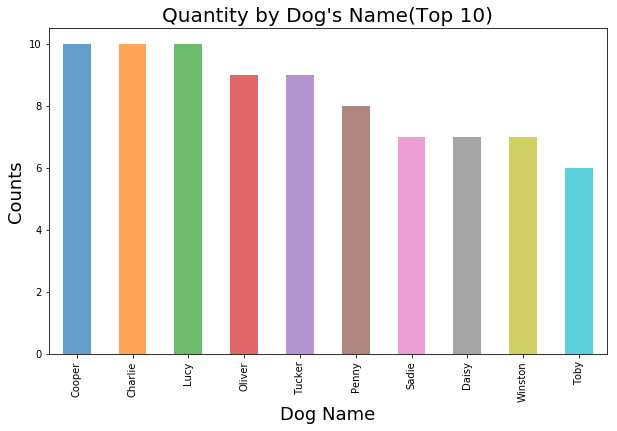

In [23]:
#Eliminar registros que não tem atribuição de Nome
df_graph_dog_name = twitter_archive_master.query('dog_name != "None"')

#Lista de 10 nomes mais atribuidos aos cachorros
df_graph_dog_name_10 = df_graph_dog_name.dog_name.value_counts().head(10)

#Gerar gráfico da Lista de 10 nomes mais atribuidos aos cachorros
plt.figure(figsize=(10,6))
df_graph_dog_name_10.plot(kind='bar', alpha=.7)
plt.title("Quantity by Dog's Name(Top 10)", fontsize=20)
plt.xlabel('Dog Name', fontsize=18)
plt.ylabel('Counts', fontsize=18)


Text(0,0.5,'')

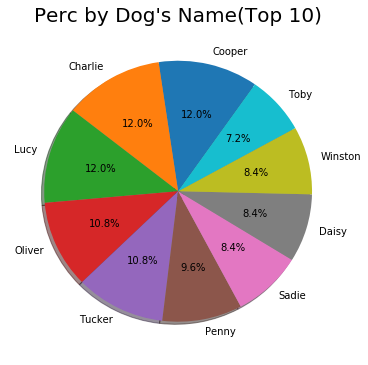

In [24]:
#Gerar gráfico Pizza - Percentual de 10 nomes mais atribuidos aos cachorros
plt.figure(figsize=(6,6))
df_graph_dog_name['dog_name'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%',startangle=55, shadow=True)
plt.title("Perc by Dog's Name(Top 10)", fontsize=20)
plt.ylabel('')


Total Qty of Dog Names:  1185
Total Qty of Dog Names(Top 10):  83
Top One of Dog Names:  10


Text(0.5,1,"Dog's Name(Top 1) x Total Names")

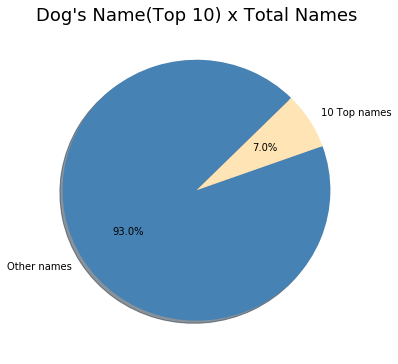

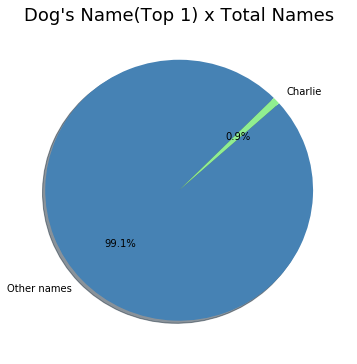

In [25]:
#Total de cachoros com nome atribuido
dog_name_count = df_graph_dog_name['dog_name'].count()

#Total de cachoros com os 10 nomes mais atribuidos aos cachorros
dog_name_count_10 = df_graph_dog_name_10.sum()

dog_name = []
dog_qty = []

dog_name.append('Other names')
dog_qty.append(dog_name_count - dog_name_count_10)
dog_name.append('10 Top names')
dog_qty.append(dog_name_count_10)

#Gerar gráfico Pizza - 10 nomes X Demais nomes
Colors  = ['steelblue', 'moccasin']
plt.figure(figsize=(6,6))
plt.pie(dog_qty,  autopct='%1.1f%%',
        shadow=True,labels=dog_name, startangle=45, colors=Colors)
plt.title("Dog's Name(Top 10) x Total Names", fontsize=18)
#plt.axis('equal')

print("Total Qty of Dog Names: ",dog_name_count)
print("Total Qty of Dog Names(Top 10): ",dog_name_count_10)


dog_name_first = sum(df_graph_dog_name.dog_name.value_counts().head(1))
print("Top One of Dog Names: ",dog_name_first)
dog_name = []
dog_qty = []

dog_name.append('Other names')
dog_qty.append(dog_name_count - dog_name_count_10)
dog_name.append('Charlie')
dog_qty.append(dog_name_first)

#Gerar gráfico Pizza - Primeiro nome X Demais nomes
Colors  = ['steelblue', 'lightgreen']
plt.figure(figsize=(6,6))
plt.pie(dog_qty,  autopct='%1.1f%%',
        shadow=True,labels=dog_name, startangle=45, colors=Colors)
plt.title("Dog's Name(Top 1) x Total Names", fontsize=18)


#### Lista de 10 Scores mais atribuidos aos cachorros
- Gerar gráfico da Lista de 10 nomes mais atribuidos aos cachorros
- Gerar gráfico do Percentual de 10 nomes mais atribuidos aos cachorros (comparado com a soma dos 10)
- Gerar gráfico do Percentual dos 10 nomes mais X Demais nomes
- Gerar gráfico do Percentual do nome mais X Demais nomes

In [26]:
#Eliminar registros que não tem atribuição de Raça
df_dog_breed = twitter_archive_master.query('dog_breed != "None"')


Text(0,0.5,'')

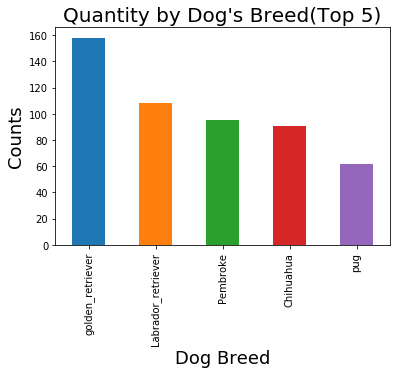

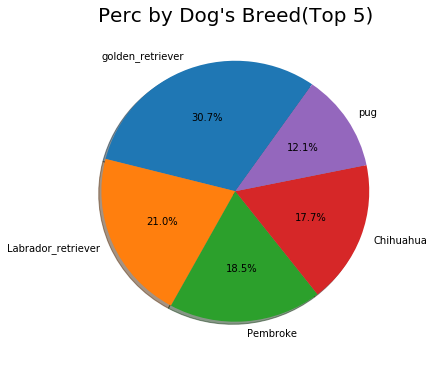

In [27]:

df_graph_dog_breed_5 = df_dog_breed.dog_breed.value_counts().head(5)

plt.figure(figsize=(6,4))
df_graph_dog_breed_5.plot(kind='bar')
plt.title("Quantity by Dog's Breed(Top 5)", fontsize=20)
plt.xlabel('Dog Breed', fontsize=18)
plt.ylabel('Counts', fontsize=18)


plt.figure(figsize=(6,6))
df_graph_dog_breed_5.plot(kind='pie',autopct='%1.1f%%',startangle=55, shadow=True )
plt.title("Perc by Dog's Breed(Top 5)", fontsize=20)
plt.ylabel('')


dog_breed
Bouvier_des_Flandres    1.300000
Saluki                  1.250000
briard                  1.233333
Tibetan_mastiff         1.225000
Border_terrier          1.214286
Name: dog_score, dtype: float64


Text(0,0.5,'')

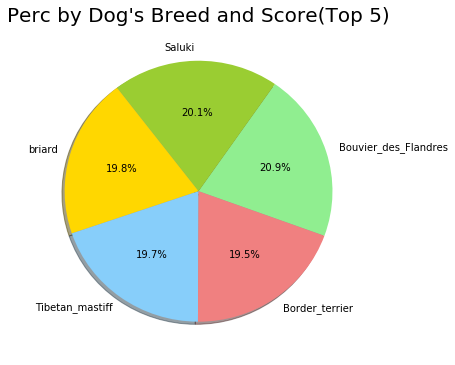

In [46]:
df_dog_rating = twitter_archive_master[['dog_stage','dog_name','dog_breed','dog_conf','retweet_count'\
                                        ,'rating_numerator','rating_denominator','favorite_count']].copy()

dog_score = []

def score(reg):    
    if reg.rating_denominator > 0:
       dog_score.append(reg.rating_numerator / reg.rating_denominator)       
       
    else:
       dog_score.append(0)         
        
# Gravar os dados da coluna 'dog_score'
df_dog_rating.apply(score, axis=1)
df_dog_rating['dog_score'] = dog_score
lst_dog_breed_5_score = df_dog_rating.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).head(5)
print(lst_dog_breed_5_score)


Colors  = [ 'lightgreen','yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.figure(figsize=(6,6))
lst_dog_breed_5_score.plot(kind='pie',autopct='%1.1f%%',startangle=-20, colors=Colors, shadow=True )
#lst_dog_breed_5_score.plot(kind='bar', color=Colors)
plt.title("Perc by Dog's Breed and Score(Top 5)", fontsize=20)
plt.ylabel('')

In [47]:
df_dog_rating.head()

,dog_stage,dog_name,dog_breed,dog_conf,retweet_count,rating_numerator,rating_denominator,favorite_count,dog_score
0,None,Tilly,Chihuahua,0.323581,6270.0,13,10,33082.0,1.3
1,None,Kilo,Eskimo_dog,0.240602,392.0,11,10,1830.0,1.1
2,None,None,pug,0.973819,855.0,10,10,3001.0,1.0
3,None,Louis,golden_retriever,0.900437,4851.0,12,10,9915.0,1.2
4,None,Frönq,papillon,0.531279,766.0,9,10,2781.0,0.9


Text(0,0.5,'Retweets')

<Figure size 648x648 with 0 Axes>

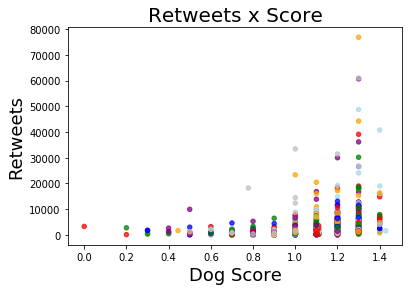

In [56]:
Colors  = [ 'lightblue','green', 'silver', 'orange', 'red','blue','purple']

plt.figure(figsize=(9,9))
df_dog_rating.plot(kind = 'scatter', x = 'dog_score', y = 'retweet_count', alpha = 0.75, color = Colors)
plt.title('Retweets x Score', fontsize=20)
plt.xlabel('Dog Score', fontsize = 18)
plt.ylabel('Retweets', fontsize = 18)



Text(0,0.5,'Retweets')

<Figure size 648x648 with 0 Axes>

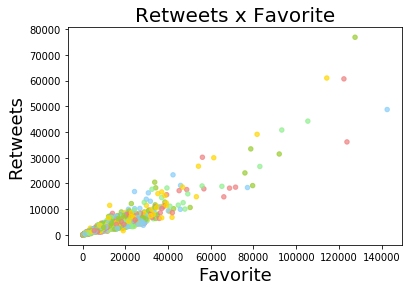

In [54]:
Colors  = [ 'lightgreen','yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.figure(figsize=(9,9))
df_dog_rating.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.7, color = Colors)
plt.title('Retweets x Favorite', fontsize = 20)
plt.xlabel('Favorite', fontsize = 18)
plt.ylabel('Retweets', fontsize = 18 )


